# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили: студент гр. 1384 Бобков Владислав, студентка гр. 1384 Усачева Дарья. Бригада № 7.

## Цель работы
Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения


## Постановка задачи
С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Порядок выполнения работы

1. Смоделировать дискретный прямоугольный импульс:
$$
s_1(k) = 
\begin{cases} 
U, & n_0 \leq k \leq n_0 + n_{imp} - 1 \\ 
0, & else
\end{cases}
$$
на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, (N -1)]$. Пояснить как выполняется моделирование импульса.

2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$: $$ s_2(k) = a_1 * x_1(k) + a_2 * x_2(k) + a_3 * x_3(k),$$ где $$ x_i(k) = B_i * \sin(\overset{\wedge}{w}_0 * k) $$ с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N -1]$. Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор P). Пояснить:

    a. операции при моделировании линейной комбинации сигналов

    b. чему равна частота дискретизации дискретного единичного скачка.

3. Вывести график дискретного сигнала  $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$ $$s(k) = C* \cos(\overset{\wedge}{w}_0 * k)$$ с экспоненциальной огибающей $|a| ^ k$, на интервале времени $n \in [0, (N -1)]$. Привести аналитическую формулу дискретного сигнала  $s_3(k)$ и пояснить операции при его моделировании.

4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

5. Сделать выводы.

## Вариант № 7:

$ N_{бр} = 7 $

$N = 30 +  N_{бр} mod 5 = 32 $

$a = (-1) ^ {N_{бр}} * (0.8 + 0.005 * (N_{бр} mod 20)) = -0.835 $

$C = 1 + N_{бр} mod 5 = 3$

$\overset{\wedge}{w}_0(рад) = \frac{\pi}{(6 + N_{бр} mod 5)} = \frac{\pi}{8}$

$U = N_{бр} mod 20 + 1 = 8$

$n_0 = 3 + N_{бр} mod 5 = 5$

$n_{imp} = 5 + N_{бр} mod 5 = 7$

$B_1 = 1.5 + N_{бр} mod 5 = 3.5$

$B_2 = 5.7 - N_{бр} mod 5 = 3.7$

$B_3 = 2.2 + N_{бр} mod 5 = 4.2$

$\overset{\wedge}{w}_1 = \frac{\pi}{(4 + N_{бр} mod 5)} = \frac{\pi}{6}$

$\overset{\wedge}{w}_2 = \frac{\pi}{(8 + N_{бр} mod 5)} = \frac{\pi}{10}$

$\overset{\wedge}{w}_3 = \frac{\pi}{(16 + N_{бр} mod 5)} = \frac{\pi}{18}$

$a_1 = 1.5 - N_{бр} mod 5 = -0.5$

$a_2 = 0.7 + N_{бр} mod 5 = 2.7$

$a_3 = 1.4 + N_{бр} mod 5 = 3.4$







## Выполнение работы

In [70]:
import numpy as np
import matplotlib.pyplot as plt

N = 32 # длина последовательности
a = -0.835 # основание экспоненты
C = 3 # амплитуда гармонического сигнала
w_0 = np.pi / 8 # частота гармонического сигнала
U = 8 # амплитуда импульса
n_0 = 5 # начальный момент импульса
n_imp = 7 # длина импульса

# амлпитуды гармонических сигналов
B = np.array([3.5, 3.7, 4.2])

# частоты гармонических сигналов
w = np.array([np.pi / 6, np.pi / 10, np.pi / 18])

# коэффициенты линейной комбинации гармонических сигналов
a_i = np.array([-0.5, 2.7, 3.4])

# моменты времени
k_1 = k_3 = np.arange(0, N - 1) 
k_2 = np.arange(0, 5 * N - 1)


### Задание 1

Для моделирования дискретного прямоугольного импульса нужно написать функцию, которая будет формировать множество значений $s_1(k)$, которое будет отображать $k$ в $U$, если $n_0 \leq k \leq n_0 + n_{imp} - 1$, иначе будет отображать в 0. Моделирование данного импульса будет подобно моделированию дискретного единичного скачка $\sigma_d(k)$, будет отличаться условие, при котором значение импульса будет ненулевым, и само значение импульса при таком условии.

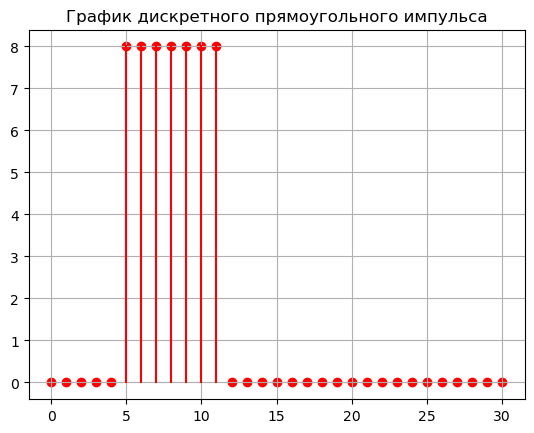

In [71]:


def plot_for_signals(x, y, label): # функция для построения графика
    plt.scatter(x, y, color='red')
    for xi, yi in zip(x, y):
        plt.plot([xi, xi], [0,yi], color='red')
    plt.title(label)
    plt.grid(True)
    plt.show()
    
def model_discreate_rectangle_impulse(time_array):
    result = np.zeros_like(time_array)
    positive_indices = (time_array >= n_0) & (time_array <= n_0 + n_imp - 1)
    result[positive_indices] = U
    return result

plot_for_signals(k_1, model_discreate_rectangle_impulse(k_1), "График дискретного прямоугольного импульса")

### Задание 2

a. Для моделирования линейной комбинации сигналов $s_2(k)$ нужно для начала просчитать каждый дискретный гармонический сигнал $x_i(k)$, значения для которого можно найти с помощью формулы: $ x_i(k) = B_i * \sin(\overset{\wedge}{w}_0 * k) $, зачем посчитать сумму этих сигналов, таким образом получится линейная комбинация дискретных гармонических сигналов.

b. Среднее значение сигнала (идентификатор mean_s2): $$ mean\_ s2 = \frac{1}{T}\sum_{n=0}^{T} s_2(n) $$
Энергия сигнала (идентификатор E): $$ E = \sum_{n=0}^{T} s_2^2(n) $$
Средняя мощность сигнала (идентификатор P): $$ P = \frac{1}{T} \sum_{n=0}^{T} s_2^2(n) $$

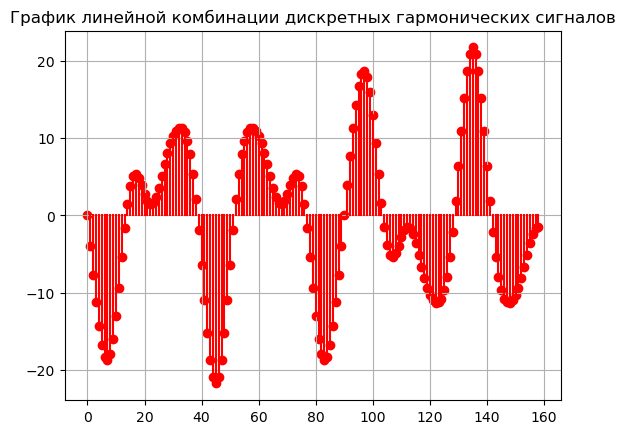

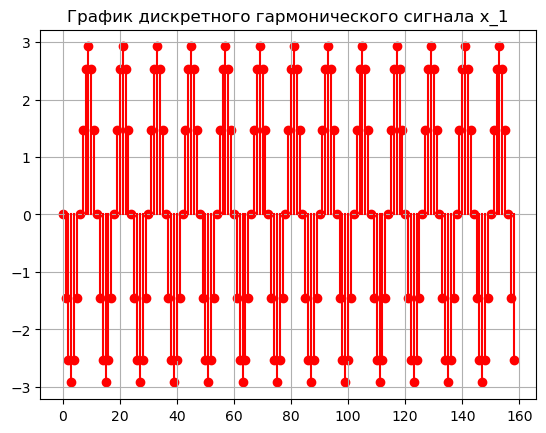

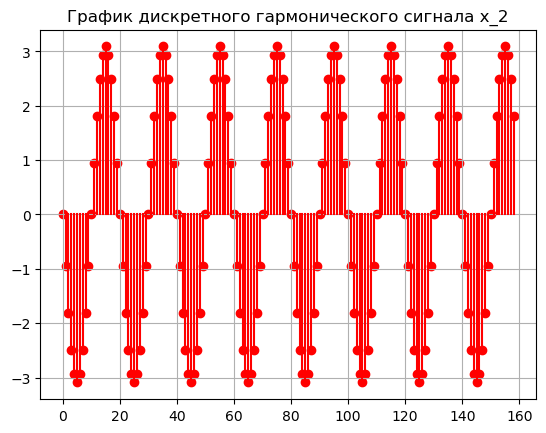

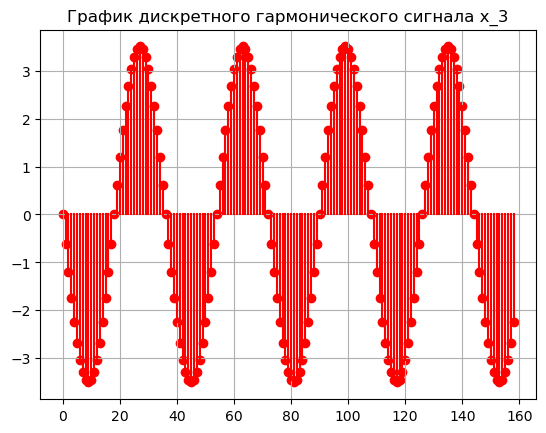

In [72]:
def calculate_term(B, w, time_array):
    x_i = np.zeros_like(time_array)
    x_i = B * np.sin(w * time_array)
    return a * x_i

def model_linear_combination(time_array):
    s_2 = np.zeros_like(time_array)
    s_2 = a_i[0] * calculate_term(B[0], w[0], time_array) + a_i[1] * calculate_term(B[1], w[1], time_array) + a_i[2] * calculate_term(B[2], w[2], time_array)
    return s_2

plot_for_signals(k_2, model_linear_combination(k_2), "График линейной комбинации дискретных гармонических сигналов")
for i in range(3):
    graphic_label = "График дискретного гармонического сигнала x_" + str(i + 1)
    plot_for_signals(k_2, calculate_term(B[i], w[i], k_2), graphic_label)


Как можно заметить из графика линейной комбинации дискретных гармонических сигналов, период T явно больше, чем $5N - 1$, поэтому для вычисления таких численных характеристик, как среднее значение, энергия и средняя мощность, нужно найти период данной последовательности. Ниже представлен код для нахождения периода последовательности $s_2(k)$.

In [78]:
def find_period(signal):
    n = len(signal)
    for period in range(1, n // 2 + 1):
        if all(signal[i] - signal[i + period] < 1e-10 for i in range(n - period)):
            return period
    return None 

period = find_period(model_linear_combination(np.arange(0, 20 * N + 1)))
print("Период сигнала:", period)

Период сигнала: 180


Был найден период последовательности $s_2(k)$, он составляет 180, теперь можно посчитать названные ваше численные характеристики.

In [86]:
def find_mean_value(signal):
    return np.mean(signal)

def find_energy(signal):
    return np.sum(signal ** 2)

def find_mean_power(signal):
    return np.sum(signal ** 2) / len(signal)

signal = model_linear_combination(np.arange(0, period))
mean_s2 = find_mean_value(signal)
E = find_energy(signal)
P = find_mean_power(signal)

print("Среднее значение:", mean_s2)
print("Энергия:", E)
print("Средняя мощность последовательности", P) 

Среднее значение: -3.1579677144893343e-16
Энергия: 19250.584445249995
Средняя мощность последовательности 106.94769136249997


### Задание 4

Для того, чтобы вывести такой график, нужно смоделировать 5 прямоугольных импульсов длины $n_{imp}$ и амплитуды $U$, расстояние между которыми будет равным $n_{imp}$. Таким образом 1 период в таком графике будет представлять следующее: прямоугольный импульс длины $n_{imp}$ и амплитуды $U$, затем нулевое значение для оси $y$ при последующих $n_{imp}$ значениях аргумента.

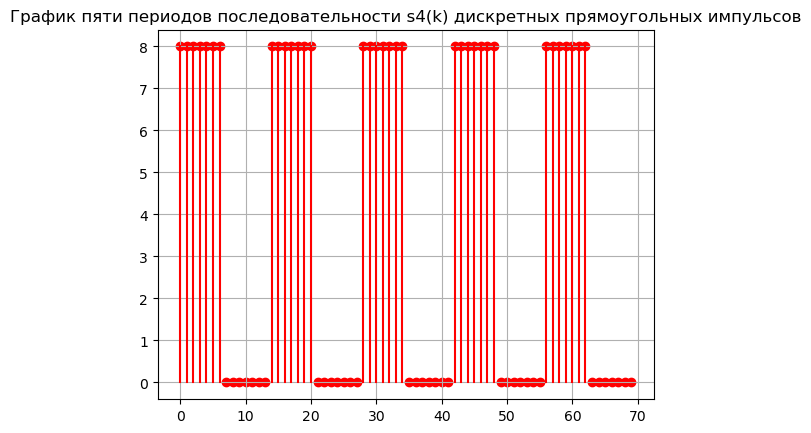

In [89]:
time_array = np.arange(0, 5 * (n_imp * 2))

def model_five_discreate_rectangle_impulses(time_array):
    result = np.zeros_like(time_array)
    for i in range(5):
        result[i * (n_imp * 2): i * (n_imp * 2) + n_imp] = U  
    return result

plot_for_signals(time_array, model_five_discreate_rectangle_impulses(time_array), "График пяти периодов последовательности s4(k) дискретных прямоугольных импульсов")